# sklearn-鸢尾花（iris）数据集

In [40]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

## 加载数据集

 iris数据集

鸢尾花（iris）数据集是一个经典数据集，在统计学习和机器学习领域都经常被用作示例。数据集内包含 3 类共 150 条记录，每类各 50 个数据，每条记录都有 4 项特征：花萼长度、花萼宽度、花瓣长度、花瓣宽度，可以通过这4个特征预测鸢尾花卉属于（iris-setosa, iris-versicolour, iris-virginica）中的哪一品种。

In [41]:
# 加载数据集
data = load_iris()

### 了解数据

In [43]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [46]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
type(data.data),type(data.target),len(data.data),len(data.target)

(numpy.ndarray, numpy.ndarray, 150, 150)

In [45]:
data.data.shape, data.target.shape

((150, 4), (150,))

In [13]:
data.target[45:55]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

### 数据预处理

In [47]:
# 转换成.DataFrame形式
df = pd.DataFrame(data.data, columns=data.feature_names)

In [48]:
# x,y的形式
df["Species"] = data.target

In [49]:
# 查看数据集信息
print(f"数据集信息:\n{df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
数据集信息:
None


发现无缺失数据

In [50]:
# 查看各特征列的摘要信息
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [51]:
# 查看前5条数据
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
# 用品种名替代数值作为标签
target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
df['Species'] = df['Species'].replace(targets)

In [53]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
X =  df.drop(columns="Species")
y = df["Species"]

In [17]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

In [55]:
feature_names = df.columns

In [56]:
feature_names

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [57]:
labels = y.unique()

In [58]:
labels

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## 数据预处理最终代码

In [59]:
# 加载数据集
data = load_iris() 
# 转换成.DataFrame形式
df = pd.DataFrame(data.data, columns = data.feature_names)
# 添加品种列
df['Species'] = data.target

# 用品种名替代数值作为标签
target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
df['Species'] = df['Species'].replace(targets)

# 提取数据和标签
X = df.drop(columns="Species")
y = df["Species"]
feature_names = X.columns
labels = y.unique()

## 决策树

### 决策树生成

In [60]:
# 划分数据集
X_train, test_x, y_train, test_lab = train_test_split(X, y, test_size=0.4, random_state=42)
# 创建模型
model = DecisionTreeClassifier(max_depth=3, random_state=42)
# 训练模型
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [61]:
y_pred = model.predict(data.data)
y_pred

D:\yangdaopy\Pycharm\pythondownload\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor

In [64]:
# 预测准确率
model.score(test_x, test_lab)


0.9833333333333333

# 可视化决策树的方式

In [69]:
from sklearn import tree

## 以文字形式输出树

In [66]:
# 以文字形式输出树 
test_representation = tree.export_text(model)
print(test_representation)

|--- feature_2 <= 2.45
|   |--- class: setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- class: versicolor
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: virginica



## plot_tree

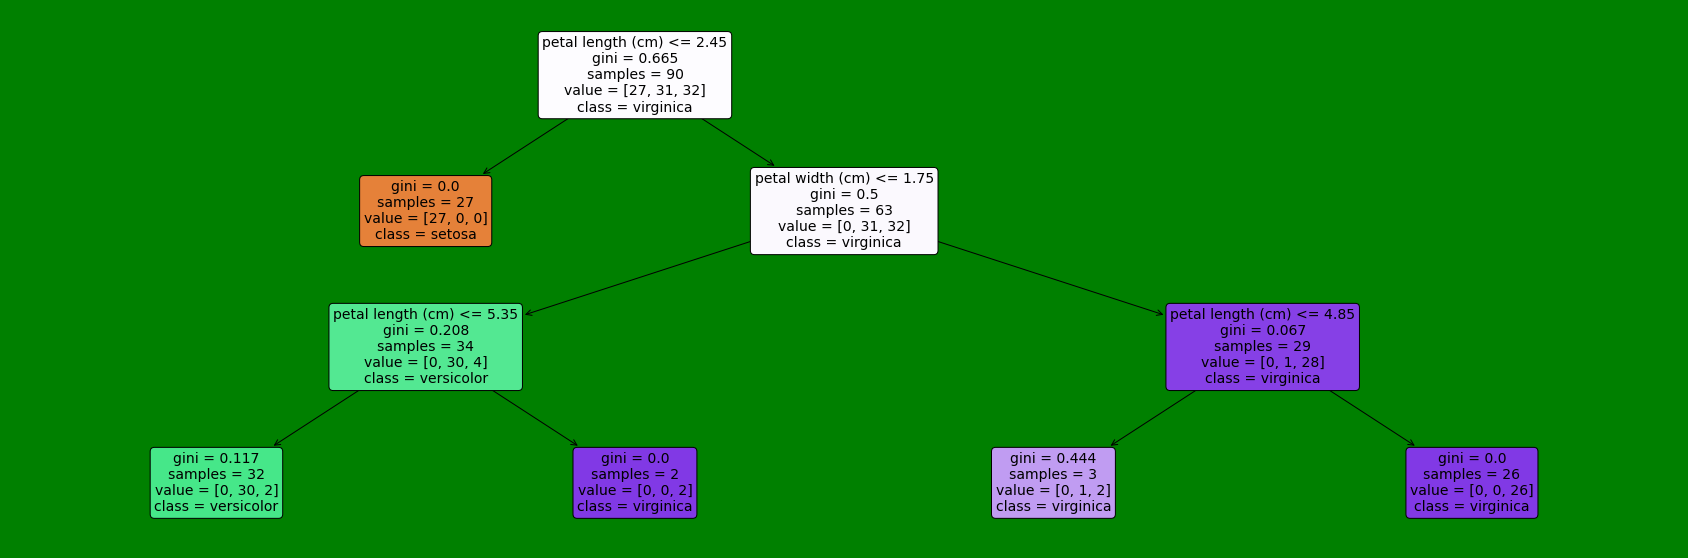

In [68]:
# 用图片画出:plot_tree
plt.figure(figsize=(30,10), facecolor="g")
a = tree.plot_tree(model, feature_names=feature_names, class_names=labels, rounded=True, filled=True, fontsize=14)
plt.show()

## graphviz模块

该模块需要安装graphviz，推荐在ubuntu上```sudo apt install graphviz```或者Mac上```brew install graphviz```

https://zhuanlan.zhihu.com/p/268532582

In [70]:
graphviz??

Object `graphviz` not found.


In [71]:
import graphviz

In [72]:
graphviz??

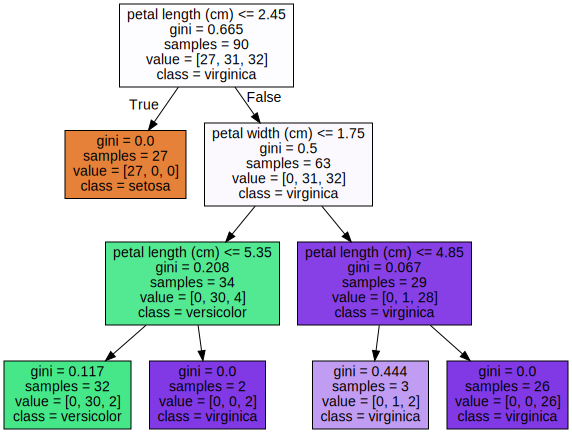

In [73]:
# 通过export_graphviz()方法将之前搭建的决策树模型model转换为字符串格式并赋值给dot_data，
# 其中注意需要设定out_file参数为None，这样获得的才是字符串格式
dot_data = tree.export_graphviz(model, out_file=None, feature_names=feature_names, class_names=labels, filled=True)
# 将dot_data转换成可视化的格式
graph = graphviz.Source(dot_data, format="png")
graph

In [74]:
# dot_data就是字符串格式
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="petal length (cm) <= 2.45\\ngini = 0.665\\nsamples = 90\\nvalue = [27, 31, 32]\\nclass = virginica", fillcolor="#fdfcff"] ;\n1 [label="gini = 0.0\\nsamples = 27\\nvalue = [27, 0, 0]\\nclass = setosa", fillcolor="#e58139"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="petal width (cm) <= 1.75\\ngini = 0.5\\nsamples = 63\\nvalue = [0, 31, 32]\\nclass = virginica", fillcolor="#fbf9fe"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="petal length (cm) <= 5.35\\ngini = 0.208\\nsamples = 34\\nvalue = [0, 30, 4]\\nclass = versicolor", fillcolor="#53e892"] ;\n2 -> 3 ;\n4 [label="gini = 0.117\\nsamples = 32\\nvalue = [0, 30, 2]\\nclass = versicolor", fillcolor="#46e789"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 0, 2]\\nclass = virginica", fillcolor="#8139e5"] ;\n3 -> 5 ;\n6 [label="peta

## dtreeviz模块

dtreevizd的y_data需要输入数值，所以前面的数据预处理不合适，这里重新进行了数据集处理

In [75]:
import dtreeviz

In [76]:
dtreeviz??

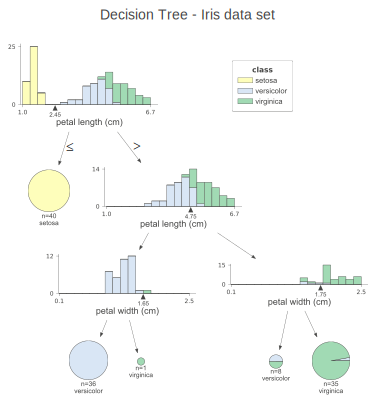

In [77]:
from dtreeviz.trees import *

# 准备数据
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 拟合
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
# dtreevizd的y_data需要输入数值，所以前面的数据预处理不合适，这里重新进行了数据集处理
viz = dtreeviz(clf, 
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=data.feature_names, 
               class_names=list(data.target_names), 
               title="Decision Tree - Iris data set")
viz

# 预测
## sns.heatmap可视化报告

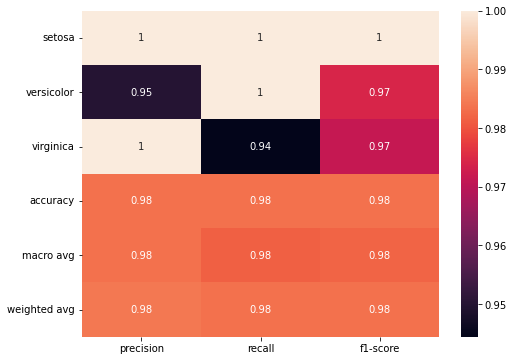

In [78]:
from sklearn.metrics import classification_report
y_pred = model.predict(test_x)
# clf_report是字符串描述
clf_report = classification_report(test_lab, y_pred, labels=labels, target_names=target_names, output_dict=True)
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.show()

In [80]:
clf_report# clf_report是字符串描述

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23},
 'versicolor': {'precision': 0.95,
  'recall': 1.0,
  'f1-score': 0.9743589743589743,
  'support': 19},
 'virginica': {'precision': 1.0,
  'recall': 0.9444444444444444,
  'f1-score': 0.9714285714285714,
  'support': 18},
 'accuracy': 0.9833333333333333,
 'macro avg': {'precision': 0.9833333333333334,
  'recall': 0.9814814814814815,
  'f1-score': 0.981929181929182,
  'support': 60},
 'weighted avg': {'precision': 0.9841666666666666,
  'recall': 0.9833333333333333,
  'f1-score': 0.9833089133089132,
  'support': 60}}

# 泰坦尼克号

决策树对泰坦尼克号进行预测生死

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier

## 加载数据集

In [92]:
# 获取数据
titan = pd.read_csv("./data/titanic.txt")

### 数据观察

In [3]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  1313 non-null   int64  
 1   pclass     1313 non-null   object 
 2   survived   1313 non-null   int64  
 3   name       1313 non-null   object 
 4   age        633 non-null    float64
 5   embarked   821 non-null    object 
 6   home.dest  754 non-null    object 
 7   room       77 non-null     object 
 8   ticket     69 non-null     object 
 9   boat       347 non-null    object 
 10  sex        1313 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB


观察到survived列就是标签

In [4]:
titan.shape

(1313, 11)

In [5]:
titan.dtypes

row.names      int64
pclass        object
survived       int64
name          object
age          float64
embarked      object
home.dest     object
room          object
ticket        object
boat          object
sex           object
dtype: object

观察到标签是数值化了的，特征中类型多样

In [6]:
titan.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


## 数据预处理

### 提取特征和标签

In [93]:
# 提取特征(这里只筛选部分特征)
X = titan[['pclass', 'age', 'sex']]
# 提取目标值
y = titan["survived"]

In [106]:
labels = y.unique()
labels

array([1, 0], dtype=int64)

In [107]:
target_names = np.array(["是", "否"])

In [8]:
X.head()

,pclass,age,sex
0,1st,29.0000,female
1,1st,2.0000,female
2,1st,30.0000,male
3,1st,25.0000,female
4,1st,0.9167,male


In [9]:
y.head()

0    1
1    0
2    0
3    0
4    1
Name: survived, dtype: int64

### 缺失值处理

In [10]:
# 观察缺失值：info()与shape
X.shape

(1313, 3)

In [11]:
# 观察缺失值：info()与shape,看Non_Null这一列
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1313 non-null   object 
 1   age     633 non-null    float64
 2   sex     1313 non-null   object 
dtypes: float64(1), object(2)
memory usage: 30.9+ KB


发现age存在缺失值-缺失值填充

In [94]:
X["age"].fillna(X["age"].mean(), inplace=True)

C:\Users\17761\AppData\Local\Temp\ipykernel_20056\2357669090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["age"].fillna(X["age"].mean(), inplace=True)


In [13]:
X.info() # 已无缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1313 non-null   object 
 1   age     1313 non-null   float64
 2   sex     1313 non-null   object 
dtypes: float64(1), object(2)
memory usage: 30.9+ KB


**其他列（离散特征）的缺失值要怎么处理??**

### 划分训练集＆测试集

In [95]:
X_train,test_X,y_train, test_y = train_test_split(X, y, test_size=0.25, random_state = 1 )

### 字符串转数值

使用字典

In [21]:
# 特征中存在字符串,需转数值
X.dtypes

pclass     object
age       float64
sex        object
dtype: object

In [22]:
# 字符串转字典示例
df = pd.DataFrame({'col1': [1, 2],
                   'col2': [0.5, 0.75]},
                  index=['row1', 'row2'])
print(df)
df.to_dict(orient="records")

      col1  col2
row1     1  0.50
row2     2  0.75


[{'col1': 1, 'col2': 0.5}, {'col1': 2, 'col2': 0.75}]

In [23]:
X_train[0:5]

,pclass,age,sex
995,3rd,31.194181,male
1037,3rd,31.194181,male
573,2nd,35.000000,female
471,2nd,31.000000,male
631,3rd,26.000000,male


In [24]:
X_train[0:5].to_dict(orient="records")

[{'pclass': '3rd', 'age': 31.19418104265403, 'sex': 'male'},
 {'pclass': '3rd', 'age': 31.19418104265403, 'sex': 'male'},
 {'pclass': '2nd', 'age': 35.0, 'sex': 'female'},
 {'pclass': '2nd', 'age': 31.0, 'sex': 'male'},
 {'pclass': '3rd', 'age': 26.0, 'sex': 'male'}]

In [96]:
# 字符串转数值(转换为onehot编码)
dic = DictVectorizer(sparse=False)
# 注意训练集和测试集的转换不同
X_train = dic.fit_transform(X_train.to_dict(orient="records"))
test_X = dic.transform(test_X.to_dict(orient="records"))

In [26]:
# 数值化:转换为onehot编码
X_train[0:5]

array([[31.19418104,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ],
       [31.19418104,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ],
       [35.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ],
       [31.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ],
       [26.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ]])

In [99]:
feature_names = dic.get_feature_names_out()

In [100]:
feature_names

array(['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female',
       'sex=male'], dtype=object)

## 算法：决策树分类器

不使用参数

In [97]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

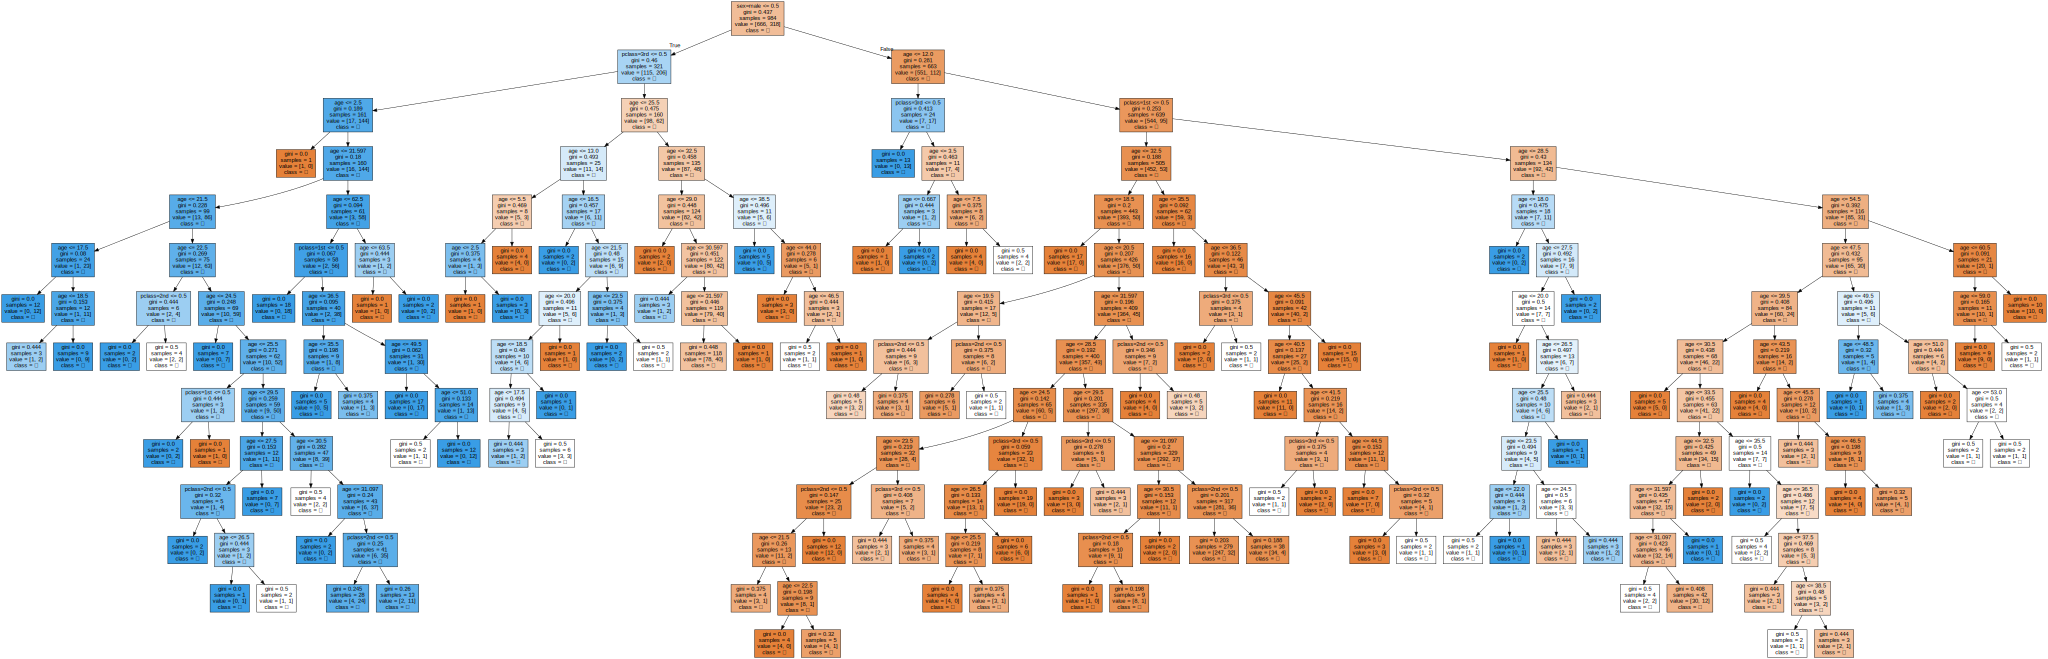

In [109]:
# 决策树可视化
# 通过export_graphviz()方法将之前搭建的决策树模型model转换为字符串格式并赋值给dot_data，
# 其中注意需要设定out_file参数为None，这样获得的才是字符串格式
dot_data = tree.export_graphviz(model, out_file=None, feature_names=feature_names, class_names=target_names, filled=True)
# 将dot_data转换成可视化的格式
graph = graphviz.Source(dot_data, format="png")
graph

In [29]:
# 预测准确率
model.score(test_X, test_y)

0.8115501519756839

使用参数:预剪枝

In [110]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4)

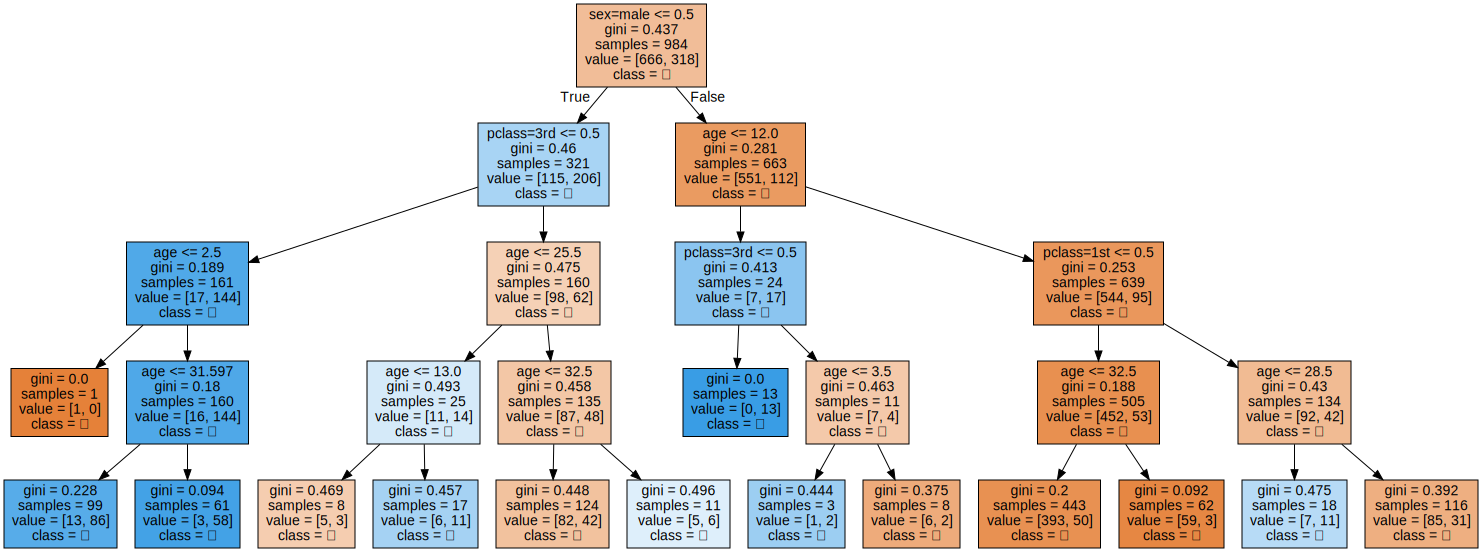

In [111]:
# 决策树可视化
# 通过export_graphviz()方法将之前搭建的决策树模型model转换为字符串格式并赋值给dot_data，
# 其中注意需要设定out_file参数为None，这样获得的才是字符串格式
dot_data = tree.export_graphviz(model, out_file=None, feature_names=feature_names, class_names=target_names, filled=True)
# 将dot_data转换成可视化的格式
graph = graphviz.Source(dot_data, format="png")
graph

In [112]:
# 预测准确率
model.score(test_X, test_y)

0.8328267477203647

使用参数:随机森林

In [33]:
rf = RandomForestClassifier(n_jobs = -1)
'''
 n_jobs充分利用多核的一个参数:
    n_jobs = -1:get_ipython据自身CPU启动对应的核数
    default = None：只启动一核   
'''

'\n n_jobs充分利用多核的一个参数:\n    n_jobs = -1:get_ipython据自身CPU启动对应的核数\n    default = None：只启动一核   \n'

使用随机森林要结合网格搜索

In [35]:
param = {"n_estimators":[200, 500], "max_depth":[2,3,5,8, 15, 25]}
gscv = GridSearchCV(rf, param_grid=param, cv=3)
gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [2, 3, 5, 8, 15, 25],
                         'n_estimators': [200, 500]})

In [36]:
# 预测的准确率
gscv.score(test_X, test_y)

0.8389057750759878

In [37]:
# 查看选择的参数模型
gscv.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [38]:
# 选择最好的模型
gscv.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=200, n_jobs=-1)

In [39]:
# 每个超参数每次交叉验证的结果
print("每个超参数每次交叉验证的结果:",gscv.cv_results_)

每个超参数每次交叉验证的结果: {'mean_fit_time': array([0.48896496, 0.1843578 , 0.09548982, 0.18858687, 0.09787663,
       0.20390654, 0.10624321, 0.1963075 , 0.10391466, 0.19336605,
       0.09867915, 0.21532512]), 'std_fit_time': array([0.55227403, 0.00170136, 0.00114425, 0.00325335, 0.00083339,
       0.00609822, 0.00435504, 0.00077382, 0.00284583, 0.00264898,
       0.00163356, 0.01603774]), 'mean_score_time': array([0.02692429, 0.05865932, 0.02486475, 0.05938196, 0.0249873 ,
       0.068729  , 0.02623955, 0.05999692, 0.02660513, 0.05766217,
       0.02550014, 0.06308842]), 'std_score_time': array([0.00240718, 0.0008259 , 0.000824  , 0.00372819, 0.00092297,
       0.01072706, 0.00095223, 0.00139388, 0.00214566, 0.00111926,
       0.00086728, 0.00194772]), 'param_max_depth': masked_array(data=[2, 2, 3, 3, 5, 5, 8, 8, 15, 15, 25, 25],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=ob